<a href="https://colab.research.google.com/github/DianaDwiRahayu/AnalisisSentimenPilpres/blob/main/Pelabelan_Lexicon_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

data = pd.read_csv("PreprocessingData.csv")
data.head(5)

,full_text,cleasing,case_folding,tokenize,Filtering/stopword removal,stemming_data
0,Presiden terpilih Pak @Prabowo kembali menegas...,Presiden terpilih Pak Prabowo kembali menegask...,presiden terpilih pak prabowo kembali menegask...,"['presiden', 'terpilih', 'pak', 'prabowo', 'ke...","['presiden', 'terpilih', 'prabowo', 'sikap', '...",presiden terpilih prabowo sikap komitmennya me...
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh dari presiden terpilih prabowo...,"['pesan', 'menyentuh', 'dari', 'presiden', 'te...","['pesan', 'menyentuh', 'presiden', 'terpilih',...",pesan menyentuh presiden terpilih prabowo subi...
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menyatakan ...,"['presiden', 'terpilih', 'prabowo', 'subianto'...","['presiden', 'terpilih', 'prabowo', 'subianto'...",presiden terpilih prabowo subianto menuntaskan...
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik tampaknya bakal berubah di tah...,"['situasi', 'politik', 'tampaknya', 'bakal', '...","['situasi', 'politik', 'berubah', 'pemicunya',...",situasi politik berubah pemicunya prabowo subi...
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,semua elemen masyarakat dukung hasil pemilu p...,"['semua', 'elemen', 'masyarakat', 'dukung', 'h...","['elemen', 'masyarakat', 'dukung', 'hasil', 'p...",elemen masyarakat dukung hasil pemilu prabowog...


In [12]:
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def determine_sentiment(text):
  positive_count = sum(1 for word in text.split() if word in positive_lexicon)
  negative_count = sum(1 for word in text.split() if word in negative_lexicon)
  if positive_count > negative_count:
      return "Positive"
  elif positive_count < negative_count:
      return "Negative"
  else:
      return None

data['Sentiment'] = data['stemming_data'].apply(determine_sentiment)
data.head()

,full_text,cleasing,case_folding,tokenize,Filtering/stopword removal,stemming_data,Sentiment
0,Presiden terpilih Pak @Prabowo kembali menegas...,Presiden terpilih Pak Prabowo kembali menegask...,presiden terpilih pak prabowo kembali menegask...,"['presiden', 'terpilih', 'pak', 'prabowo', 'ke...","['presiden', 'terpilih', 'prabowo', 'sikap', '...",presiden terpilih prabowo sikap komitmennya me...,None
1,Pesan menyentuh dari Presiden Terpilih Prabowo...,Pesan menyentuh dari Presiden Terpilih Prabowo...,pesan menyentuh dari presiden terpilih prabowo...,"['pesan', 'menyentuh', 'dari', 'presiden', 'te...","['pesan', 'menyentuh', 'presiden', 'terpilih',...",pesan menyentuh presiden terpilih prabowo subi...,Positive
2,Presiden terpilih Prabowo Subianto menyatakan ...,Presiden terpilih Prabowo Subianto menyatakan ...,presiden terpilih prabowo subianto menyatakan ...,"['presiden', 'terpilih', 'prabowo', 'subianto'...","['presiden', 'terpilih', 'prabowo', 'subianto'...",presiden terpilih prabowo subianto menuntaskan...,Positive
3,Situasi politik tampaknya bakal berubah di tah...,Situasi politik tampaknya bakal berubah di tah...,situasi politik tampaknya bakal berubah di tah...,"['situasi', 'politik', 'tampaknya', 'bakal', '...","['situasi', 'politik', 'berubah', 'pemicunya',...",situasi politik berubah pemicunya prabowo subi...,Positive
4,Semua elemen masyarakat dukung Hasil Pemilu 20...,Semua elemen masyarakat dukung Hasil Pemilu P...,semua elemen masyarakat dukung hasil pemilu p...,"['semua', 'elemen', 'masyarakat', 'dukung', 'h...","['elemen', 'masyarakat', 'dukung', 'hasil', 'p...",elemen masyarakat dukung hasil pemilu prabowog...,Positive


<ipython-input-13-6e4652225ba0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

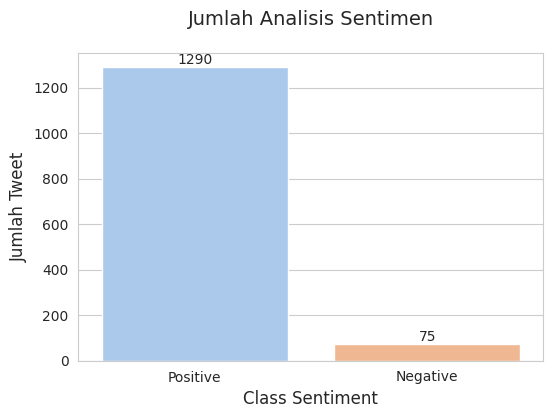

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax= plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show

In [14]:
data.to_csv('HasilLabelingData_lexicon.csv', encoding='utf8', index=False)